In [1]:
import pandas as pd
import os
from pathlib import Path

Дополнительный проект
==

В папке subsid (``shared/homeworks/python_ds_miniprojects/5_subsid``) находятся файлы (``tm_sales_1, tm_sales_2, ...``) с продажами продуктов через телемаркетинг. 
Каждый файл содержит, как минимум, 4 колонки (поля): ``FILIAL_ID, SUBS_ID, PROD_ID, ACT_DTTM``.

Суть задачи в том, чтобы проверить подключения продуктов определенным пользователям, соединив файлы о продажах с логами по подключениям в системе.

**Особенности данных:**

-сотрудники телемаркетинга не всегда указывают полный id, если ``'id'`` нет в начале ``SUBS_ID``, то нужно его добавить

-поля в файлах могут быть расположены абсолютно случайным образом, но названия полей статичны

-продажа не засчитывается, если отключение ``(END_DTTM)`` произошло меньше чем через 5 минут после подключения ``(START_DTTM)``

-если в файле с продажами встречается строка без указанного ``SUBS_ID``, она пропускается

-Сохраните результат в датафрэйм с разделителем ``;``, содержащий корректные подключения.

Note: обратите внимание на то, как pandas переводит дату из строки, возможно вам понадобится параметр ``format``

Пример содержания итогового файла (колонка `difference` это разница между `START_DTTM` и `END_DTTM`):
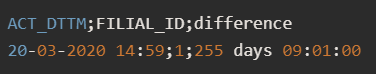

In [2]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

df1 = pd.read_csv(r'F:/subsid/tm_sales_1.csv', sep=';')
df2 = pd.read_csv(r'F:/subsid/tm_sales_2.csv', sep=';')
df3 = pd.read_csv(r'F:/subsid/tm_sales_3.csv', sep=';')
df1.head()

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25


In [3]:
df2.head()

,FILIAL_ID,SUBS_ID,PROD_ID,ACT_DTTM
0,3,id5416547,1743,17-03-2020 10:17
1,4,NaN,7421,12-03-2020 11:25
2,7,8362218,9879,05-03-2020 11:42
3,2,2185490,3210,16-03-2020 16:28


In [4]:
df3.head()

,FILIAL_ID,PROD_ID,SUBS_ID,ACT_DTTM
0,3,1499,id5764122,18-03-2020 15:44
1,6,3020,id7642700,15-03-2020 14:21
2,2,5677,id1374509,17-03-2020 11:48


In [5]:
df = pd.concat([df1, df2])
df.head()

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
0,id5416547,3,1743,17-03-2020 10:17
1,NaN,4,7421,12-03-2020 11:25


In [6]:
df = pd.concat([df, df3])
df

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
0,id5416547,3,1743,17-03-2020 10:17
1,NaN,4,7421,12-03-2020 11:25
2,8362218,7,9879,05-03-2020 11:42
3,2185490,2,3210,16-03-2020 16:28
0,id5764122,3,1499,18-03-2020 15:44
1,id7642700,6,3020,15-03-2020 14:21
2,id1374509,2,5677,17-03-2020 11:48


In [7]:
df_logs = pd.read_csv(r'F:/subsid/prod_activations_logs.csv', sep=';')
df_logs

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM
1,id4651830,1954,20-03-2020 14:59,01-12-2020 00:00
5,id7646509,6431,19-03-2020 13:00,19-03-2020 13:03
2,id7461794,3310,20-03-2020 17:25,01-12-2020 00:00
3,id5416547,1743,17-03-2020 10:17,25-03-2020 11:00
4,id8238421,1859,01-03-2020 11:42,01-03-2020 11:43
3,id8641743,2752,20-03-2020 15:44,21-04-2020 15:44
2,id2185490,3210,16-03-2020 16:28,01-12-2020 00:00
6,id7642700,3020,15-03-2020 14:21,15-03-2020 23:42
2,id8741631,5677,19-03-2020 12:28,01-12-2020 00:00


In [8]:
df.dtypes

SUBS_ID      object
FILIAL_ID     int64
PROD_ID       int64
ACT_DTTM     object
dtype: object

In [9]:
df = df.dropna()
df

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
0,id5416547,3,1743,17-03-2020 10:17
2,8362218,7,9879,05-03-2020 11:42
3,2185490,2,3210,16-03-2020 16:28
0,id5764122,3,1499,18-03-2020 15:44
1,id7642700,6,3020,15-03-2020 14:21
2,id1374509,2,5677,17-03-2020 11:48


In [10]:
df.SUBS_ID = df.SUBS_ID.apply(lambda x: x if x.startswith('id') else 'id'+ x)
df

C:\Users\Skitalica\AppData\Local\Temp\ipykernel_84\3038495809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.SUBS_ID = df.SUBS_ID.apply(lambda x: x if x.startswith('id') else 'id'+ x)


,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,id7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
0,id5416547,3,1743,17-03-2020 10:17
2,id8362218,7,9879,05-03-2020 11:42
3,id2185490,2,3210,16-03-2020 16:28
0,id5764122,3,1499,18-03-2020 15:44
1,id7642700,6,3020,15-03-2020 14:21
2,id1374509,2,5677,17-03-2020 11:48


In [11]:
pd.to_datetime(df['ACT_DTTM'])

0   2020-03-20 14:59:00
1   2020-03-19 13:00:00
2   2020-03-22 17:25:00
0   2020-03-17 10:17:00
2   2020-05-03 11:42:00
3   2020-03-16 16:28:00
0   2020-03-18 15:44:00
1   2020-03-15 14:21:00
2   2020-03-17 11:48:00
Name: ACT_DTTM, dtype: datetime64[ns]

In [12]:
df_log = df.merge(df_logs, how='inner', on=['PROD_ID', 'SUBS_ID'])
df_log

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM,START_DTTM,END_DTTM
0,id4651830,1,1954,20-03-2020 14:59,20-03-2020 14:59,01-12-2020 00:00
1,id7646509,5,6431,19-03-2020 13:00,19-03-2020 13:00,19-03-2020 13:03
2,id5416547,3,1743,17-03-2020 10:17,17-03-2020 10:17,25-03-2020 11:00
3,id2185490,2,3210,16-03-2020 16:28,16-03-2020 16:28,01-12-2020 00:00
4,id7642700,6,3020,15-03-2020 14:21,15-03-2020 14:21,15-03-2020 23:42


In [13]:
df_log.dtypes

SUBS_ID       object
FILIAL_ID      int64
PROD_ID        int64
ACT_DTTM      object
START_DTTM    object
END_DTTM      object
dtype: object

In [14]:
df_log['ACT_DTTM'] = pd.to_datetime(df_log['ACT_DTTM'], format='%d-%m-%Y %H:%M')

In [15]:
df_log['START_DTTM'] = pd.to_datetime(df_log['START_DTTM'], format='%d-%m-%Y %H:%M')

In [16]:
df_log['END_DTTM'] = pd.to_datetime(df_log['END_DTTM'], format='%d-%m-%Y %H:%M')

In [17]:
df_log['difference'] = df_log.END_DTTM - df_log.START_DTTM

In [21]:
df_log

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM,START_DTTM,END_DTTM,difference
0,id4651830,1,1954,2020-03-20 14:59:00,2020-03-20 14:59:00,2020-12-01 00:00:00,255 days 09:01:00
1,id7646509,5,6431,2020-03-19 13:00:00,2020-03-19 13:00:00,2020-03-19 13:03:00,0 days 00:03:00
2,id5416547,3,1743,2020-03-17 10:17:00,2020-03-17 10:17:00,2020-03-25 11:00:00,8 days 00:43:00
3,id2185490,2,3210,2020-03-16 16:28:00,2020-03-16 16:28:00,2020-12-01 00:00:00,259 days 07:32:00
4,id7642700,6,3020,2020-03-15 14:21:00,2020-03-15 14:21:00,2020-03-15 23:42:00,0 days 09:21:00


In [23]:
df_log['diff_5'] = df_log.difference >= '5m'

In [34]:
sub = df_log.query('diff_5 == True').sort_values('SUBS_ID').SUBS_ID.to_list()

In [35]:
print(*sub, sep=', ')

id2185490, id4651830, id5416547, id7642700


In [ ]:
#, format='%d-%m-%Y', dayfirst=True